<a href="https://colab.research.google.com/github/lailyafiah/Fundamental-Artificial-Intelligence/blob/main/SMS_SPAM_FILTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
sms = pd.read_csv('/content/drive/MyDrive/EUNOIA/SMSSpamCollection.csv',sep='\t', names = ['label','isi'])
sms

,label,isi
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   isi     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
#ubah Ham=0 dan Spam = 1
sms['label_baru'] = sms['label'].replace(['ham','spam'],[0,1])

In [ ]:
sms

,label,isi,label_baru
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
from wordcloud import WordCloud #melihat kata yang dominan pada dataset
import matplotlib.pyplot as plt

In [ ]:
text = " ".join(review for review in sms.isi)

In [ ]:
print(len(text))

454061


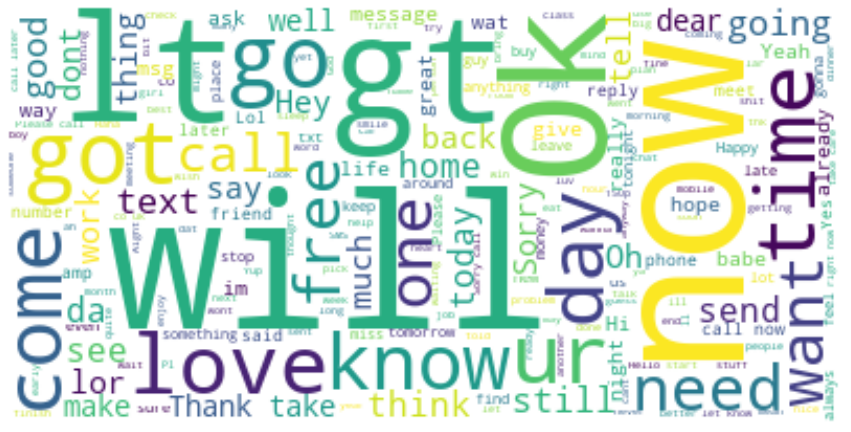

In [ ]:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#split data
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS
stop

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [ ]:
sms['isi_re_sw'] = sms['isi'].apply(lambda x: x.lower())


In [ ]:
sms

,label,isi,label_baru,isi_re_sw
0,ham,"Go until jurong point, crazy.. Available only ...",0,"go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,0,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,0,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"nah i don't think he goes to usf, he lives aro..."
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,this is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?,0,will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s...",0,"pity, * was in mood for that. so...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...,0,the guy did some bitching but i acted like i'd...


In [ ]:
sms['isi_bersih'] = sms['isi_re_sw'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
sms

,label,isi,label_baru,isi_re_sw,isi_bersih
0,ham,"Go until jurong point, crazy.. Available only ...",0,"go until jurong point, crazy.. available only ...","jurong point, crazy.. available bugis n great ..."
1,ham,Ok lar... Joking wif u oni...,0,ok lar... joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,u dun say so early hor... u c already then say...,u dun say early hor... u c say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"nah i don't think he goes to usf, he lives aro...","nah don't think goes usf, lives"
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u. u won £750 pound p...
5568,ham,Will ü b going to esplanade fr home?,0,will ü b going to esplanade fr home?,ü b going esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s...",0,"pity, * was in mood for that. so...any other s...","pity, * mood that. so...any suggestions?"
5570,ham,The guy did some bitching but I acted like i'd...,0,the guy did some bitching but i acted like i'd...,guy did bitching acted like i'd interested buy...


In [ ]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   isi         5572 non-null   object
 2   label_baru  5572 non-null   int64 
 3   isi_re_sw   5572 non-null   object
 4   isi_bersih  5572 non-null   object
dtypes: int64(1), object(4)
memory usage: 217.8+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


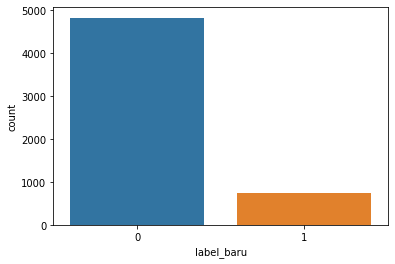

In [ ]:
import seaborn as sns

sns.countplot(sms['label_baru'])

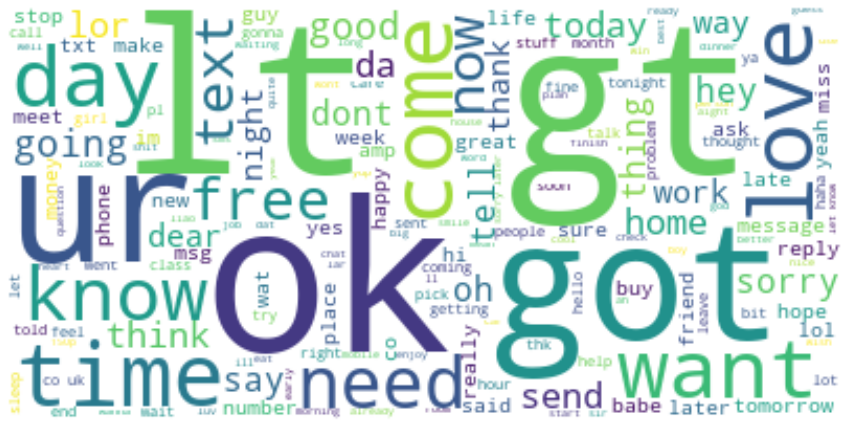

In [ ]:
#wordcloud setelah stopword
text_nonsw = " ".join(review for review in sms.isi_bersih)

wordcloud = WordCloud(background_color="white").generate(text_nonsw)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
X_train , X_test, y_train , y_test = train_test_split(sms['isi_bersih'],sms['label_baru'],test_size = 0.25)

In [ ]:
#preprocessing
#TF-IDF
#10 dokumen
# punya kata = 'dan' 
# dokumen 1 punya 10 'dan'
# stopword --> menghapus kata yang sering muncul untuk setiap dokumen


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()    #Tfidfvectorizer(stopword='English')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
X_train

1082                                    u pic msgs phone?
2261    splashmobile: choose 1000s gr8 tones wk! subsc...
687     king crying baby great building map.. imprtant...
566     ill u 2mrw ninish, address icky american freek...
5344                           guys planning coming over?
                              ...                        
2153           hi kindly documents submitted loan stapati
9       mobile 11 months more? u r entitled update lat...
3981                                   ringtoneking 84484
2524                                    sorry, i'll later
1130               check errors difficulties, correction.
Name: isi_bersih, Length: 4179, dtype: object

In [ ]:
print(X_train_tfidf)

  (0, 4991)	0.43900997781221573
  (0, 4448)	0.6239918104796425
  (0, 5004)	0.6464553038189538
  (1, 2518)	0.20243052460226743
  (1, 3782)	0.24887322535368606
  (1, 2014)	0.2349712247064656
  (1, 422)	0.2964044795112833
  (1, 1970)	0.2964044795112833
  (1, 7130)	0.21418891775814464
  (1, 5799)	0.18604032509752658
  (1, 6303)	0.2964044795112833
  (1, 7234)	0.20471714190398904
  (1, 6677)	0.44213844811849035
  (1, 3086)	0.22510759827488747
  (1, 258)	0.26498802938320354
  (1, 1749)	0.22732040165718445
  (1, 6140)	0.2964044795112833
  (2, 4587)	0.2653996175583358
  (2, 3138)	0.21418305654114964
  (2, 6675)	0.34249218367661655
  (2, 5380)	0.24087468195068026
  (2, 7195)	0.2577075946826558
  (2, 6652)	0.17898443866969413
  (2, 3495)	0.34249218367661655
  (2, 4189)	0.3150312575526845
  :	:
  (4174, 2313)	0.45397515671102473
  (4174, 3796)	0.41757555743633606
  (4174, 3288)	0.25832587532434637
  (4174, 4010)	0.37499075620239636
  (4175, 54)	0.31384516677548036
  (4175, 4412)	0.2635171339038618

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_tfidf)

In [ ]:
for pred, pesan in zip(y_pred[:20], X_test[:20]):
  print(f'PREDIKSI: {pred}  -   ISI SMS: {pesan}\n')

PREDIKSI: 0  -   ISI SMS: sweet well, princess. tell likes dislikes bed...

PREDIKSI: 0  -   ISI SMS: xy going 4 e lunch?

PREDIKSI: 0  -   ISI SMS: oh fuck's sake she's like tallahassee

PREDIKSI: 0  -   ISI SMS: shall start hear.

PREDIKSI: 0  -   ISI SMS: fuck babe ... miss already, know ? can't let send money net ? need ... want ... crave ...

PREDIKSI: 0  -   ISI SMS: ü wan 2 meet n combine parts? how's da rest da project going?

PREDIKSI: 0  -   ISI SMS: ok come ur home half hour

PREDIKSI: 0  -   ISI SMS: science tells chocolate melt sunlight. don't walk sunlight. bcoz,i don't want loss sweet friend.

PREDIKSI: 0  -   ISI SMS: yup ok thanx...

PREDIKSI: 0  -   ISI SMS: not..tel software name..

PREDIKSI: 0  -   ISI SMS: lol! oops sorry! fun.

PREDIKSI: 0  -   ISI SMS: ok...

PREDIKSI: 0  -   ISI SMS: hm good morning, headache anyone? :-)

PREDIKSI: 0  -   ISI SMS: ding ya break fassyole! blacko londn

PREDIKSI: 0  -   ISI SMS: waking 4 afternoon, sup

PREDIKSI: 0  -   ISI SMS: g

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1230,    0],
       [  50,  113]])

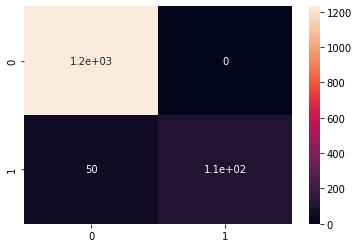

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_test, y_pred)

1.0

In [ ]:
recall_score(y_test, y_pred)

0.6932515337423313